In [ ]:
## K-Means Clustering

In [ ]:
## Data preprocessing

In [3]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset

dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values  #we need 2 features to visualise the clusters in 2D space

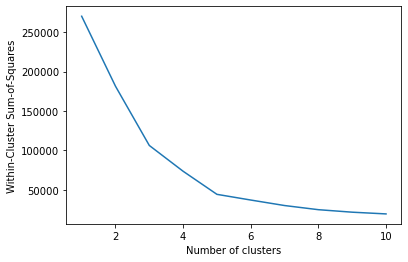

In [5]:
# Using the Elbow Method to find the optimal number of clusters

from sklearn.cluster import KMeans

# loop to run algorithm with 10 different numbers of clusters
# metric - sum of squares - sum of squared distances between each observation point and its centroid
# wcss - within cluster sum of squares
wcss = []

for i in range(1,11): #11, not 10 because stop is excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0) #avoiding random initialization trap - KMeans plus
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum-of-Squares')
plt.show()


In [6]:
# Training the K-Means algorithm on the dataset

kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=0) #avoiding random initialization trap - KMeans plus
kmeans.fit(x)

# create the dependent variable
y_kmeans= kmeans.fit_predict(x)
print(y_kmeans)

# cluster id = 0 is the firsthi cluster
# cluster id = 2 is the third cluster

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


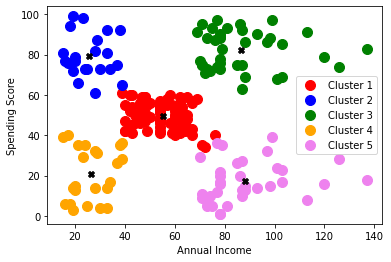

In [16]:
# Visualising the clusters

centroids = np.array(kmeans.cluster_centers_)

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, color = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, color = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, color = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 100, color = 'orange', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 100, color = 'violet', label = 'Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], marker="X", color='black')
plt.xlabel('Cluster id')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
